# SC1015 W132 Group 2 Project: Analysis of Earthquake Characteristics and Predictive Factors for Magnitude

**by Yifu, Ziru, & Zinan**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
sb.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from random import sample

### Import Earthquake Data from Kaggle and libraries
https://www.kaggle.com/datasets/warcoder/earthquake-dataset 
*Data is under CC0: Public Domain which allows our group to freely build upon, enhance and reuse the works for any purposes without restriction under copyright or database law.*

In [4]:
earthquake_raw = pd.read_csv('earthquake.csv')
earthquake = earthquake_raw[['title', 'magnitude', 'cdi', 'mmi', 'alert', 'tsunami', 'sig', 'latitude', 'longitude']]
earthquake.head(10)

title  magnitude  cdi  mmi   alert  \
0  M 7.0 - 18 km SW of Malango, Solomon Islands        7.0    8    7   green   
1      M 6.9 - 204 km SW of Bengkulu, Indonesia        6.9    4    4   green   
2                                      M 7.0 -         7.0    3    3   green   
3           M 7.3 - 205 km ESE of Neiafu, Tonga        7.3    5    5   green   
4                                      M 6.6 -         6.6    0    2   green   
5             M 7.0 - south of the Fiji Islands        7.0    4    3   green   
6             M 6.8 - south of the Fiji Islands        6.8    1    3   green   
7       M 6.7 - 60 km SSW of Boca Chica, Panama        6.7    7    6   green   
8        M 6.8 - 55 km SSW of Aguililla, Mexico        6.8    8    7  yellow   
9        M 7.6 - 35 km SSW of Aguililla, Mexico        7.6    9    8  yellow   

   tsunami   sig  latitude  longitude  
0        1   768   -9.7963   159.5960  
1        0   735   -4.9559   100.7380  
2        1   755  -20.0508  -178.3460  
3        1   833  -19.2918  -172.1290  
4        1   670  -25.5948   178.2780  
5        1   755  -26.0442   178.3810  
6        1   711  -25.9678   178.3630  
7        1   797    7.6712   -82.3396  
8        1  1179   18.3300  -102.9130  
9        1  1799   18.3667  -103.2520

In [5]:
earthquake.to_csv("earthquake_clean.csv", index=False)
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   cdi        782 non-null    int64  
 3   mmi        782 non-null    int64  
 4   alert      415 non-null    object 
 5   tsunami    782 non-null    int64  
 6   sig        782 non-null    int64  
 7   latitude   782 non-null    float64
 8   longitude  782 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 55.1+ KB


### Datasets info
title: title name given to the earthquake.

magnitude: The magnitude of the earthquake

date_time: date and time

cdi: The maximum reported intensity for the event range

mmi: The maximum estimated instrumental intensity for the event

alert: The alert level - “green”, “yellow”, “orange”, and “red”

tsunami: "1" for events in oceanic regions and "0" otherwise

sig: A number describing how significant the event is. Larger numbers indicate a more significant event. This value is determined on a number of factors, including: magnitude, maximum MMI, felt reports, and estimated impact
magType: The method or algorithm used to calculate the preferred magnitude for the event
depth: The depth where the earthquake begins to rupture
latitude / longitude: coordinate system by means of which the position or location of any place on Earth's surface can be determined and described

We used 782 earthquake data which has Richter magnitude >=6.5 from 2001/1/1 to 2023/1/1.

## Exploratory Data Analysis
### Typical earthquakes with a magnitude greater than 6.5 on the Richter scale

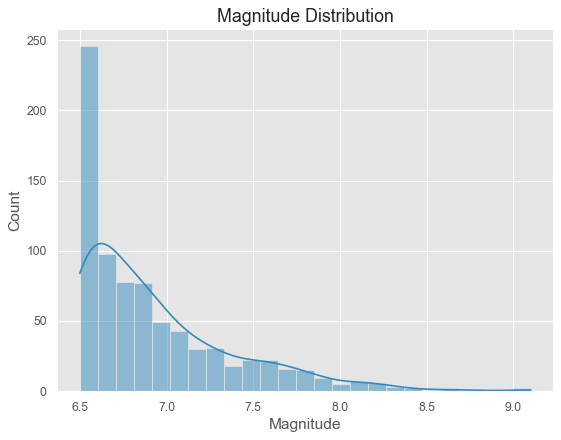

In [6]:
plt.figure(figsize=(8, 6), dpi=80)
plt.style.use('ggplot')
sb.histplot(earthquake_raw['magnitude'], bins=25, kde=True)
plt.xlabel('Magnitude', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Magnitude Distribution', fontsize=16)
plt.grid(True)
plt.show()

The Richter scale and destructive power follow an exponential growth pattern, with each increase in magnitude resulting in 10 times the destructive power of the previous level. As a result, our statistical sample exhibits strong right skewness. The majority of typical earthquakes defined as "major" occur between magnitudes 6.5 and 7 in our sample.

<AxesSubplot:>

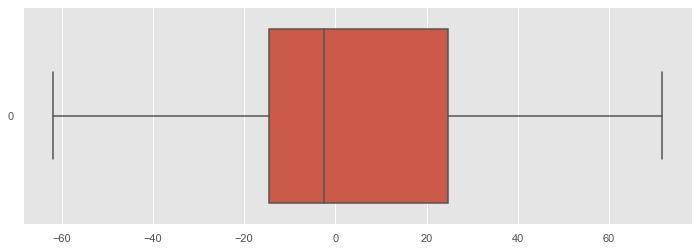

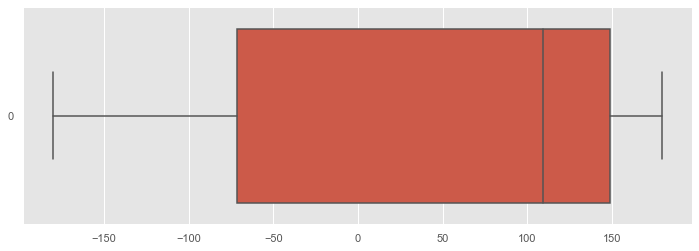

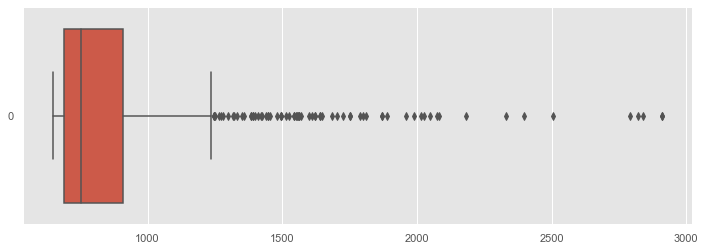

In [7]:
f = plt.figure(figsize=(12,4))
sb.boxplot(data = earthquake["latitude"], orient = "h")

f = plt.figure(figsize=(12,4))
sb.boxplot(data = earthquake["longitude"], orient = "h")

f = plt.figure(figsize=(12,4))
sb.boxplot(data = earthquake["sig"], orient = "h")

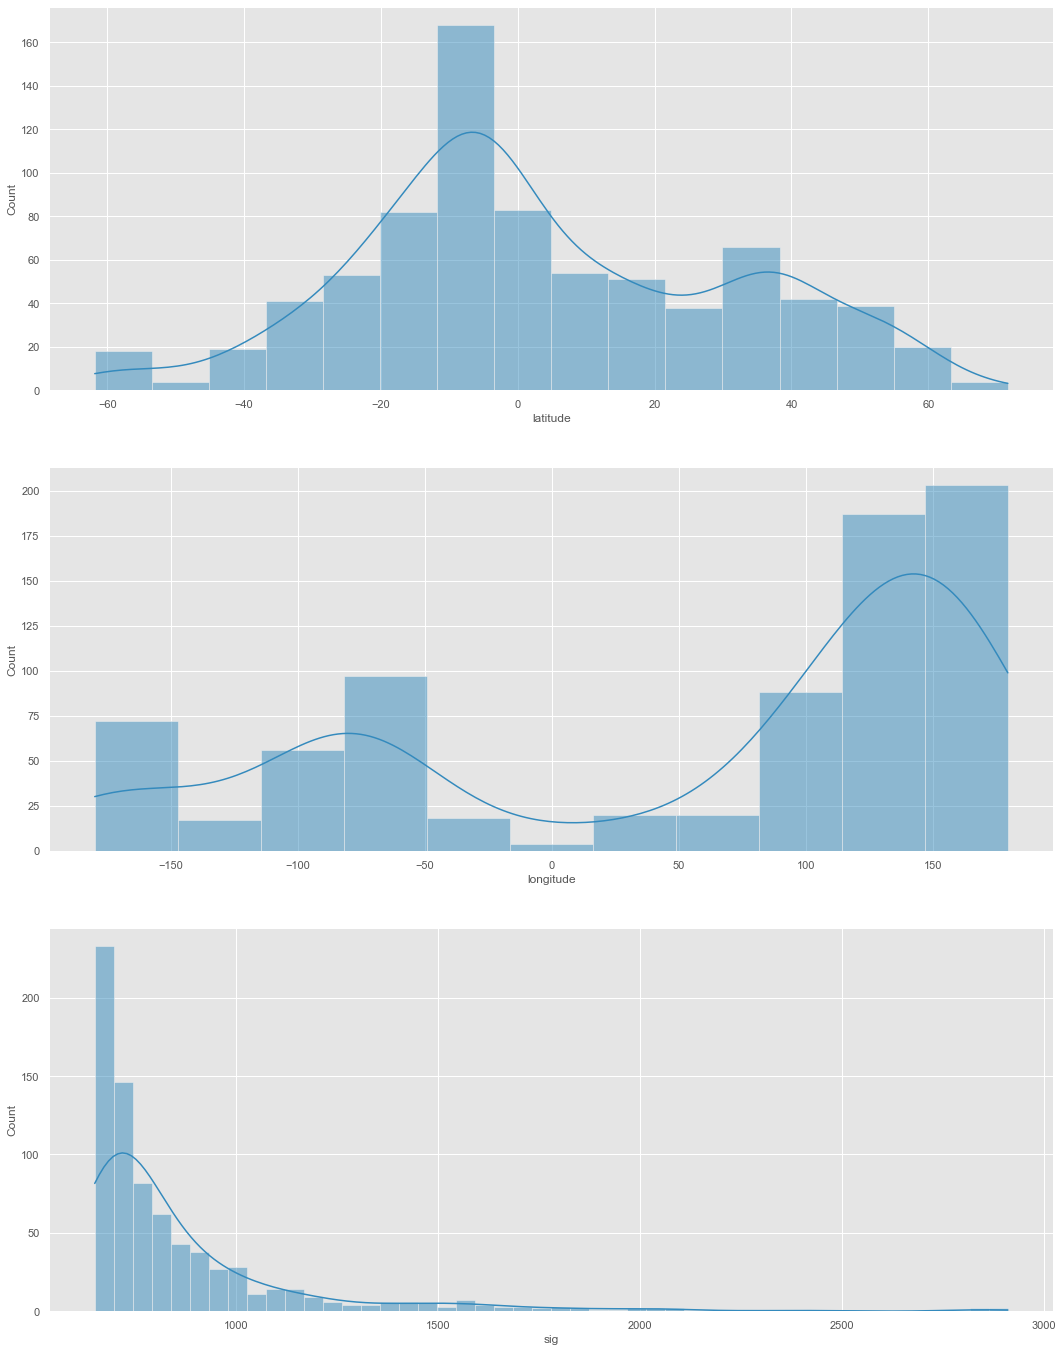

In [8]:
numdata = pd.DataFrame(earthquake[["latitude", "longitude", "sig"]])
f, axes = plt.subplots(3,1, figsize=(18, 24))
count =0
for var in numdata:
    sb.histplot (data=numdata[var],kde=True, ax=axes[count])
    count +=1

From boxplots and subplots of main characteristics of earthquake above, we could know that:

Latitude: The distribution of latitude follows a nearly bell curve. Due to the larger circumference and surface area of the low-latitude cross-section, the probability of earthquakes occurring is higher. On the contrary, the probability of earthquakes occurring decreases as latitude increases towards the earth's poles, where the surface area is smaller. Therefore, the distribution of earthquakes occurring in low-latitude regions is more common.

Longitude: it is mainly distributed in the seismic zone around the Pacific Ocean and between the Eurasian Plate.

Sig: it is a coefficient that describes the impact of earthquakes, so it exhibits strong right skewness like magnitude.

### Correlation between magnitude and tsunami

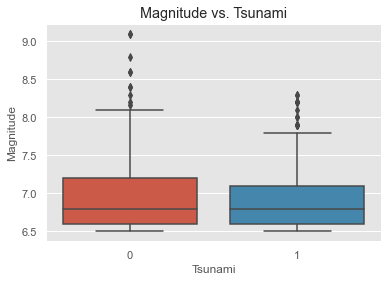

In [9]:
sb.boxplot(x="tsunami", y="magnitude", data=earthquake)
plt.xlabel('Tsunami')
plt.ylabel('Magnitude')
plt.title('Magnitude vs. Tsunami')
plt.show()

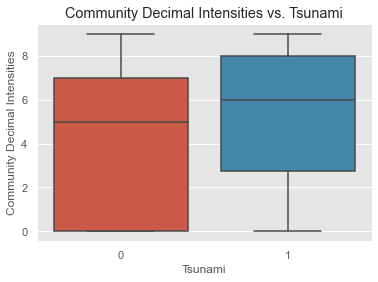

In [10]:
'''Check impact of tsunami on community decimal intensities'''
sb.boxplot(x="tsunami", y="cdi", data=earthquake)
plt.xlabel('Tsunami')
plt.ylabel('Community Decimal Intensities')
plt.title('Community Decimal Intensities vs. Tsunami')
plt.show()

Comparative boxplots above describes the relationship between tsunami and magnitude and tsunami and cdi. From the graph, we can see that whether or not there is a tsunami, the distribution of q1, median, and q3 of the magnitude is roughly the same. Therefore, we can conclude that there is no significant relationship between tsunami and magnitude.

### Map of Earthquake

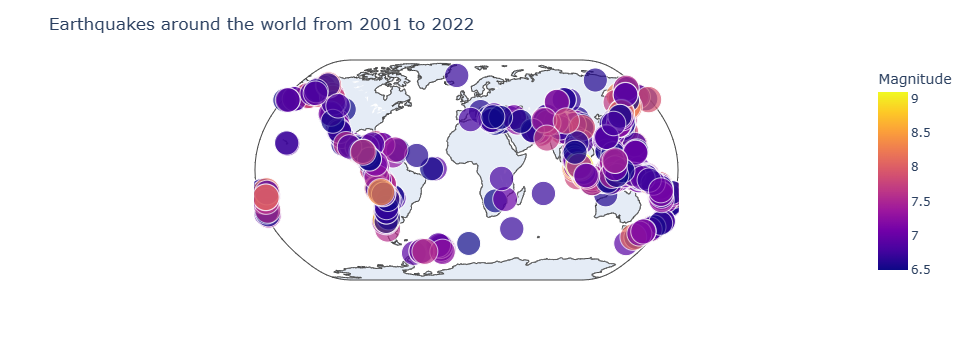

In [11]:
fig = px.scatter_geo(earthquake_raw, lat='latitude', lon='longitude', color='magnitude', size='magnitude',
                     hover_name='title', projection='natural earth', scope='world', opacity=0.7)
# Set up
fig.update_layout(title='Earthquakes around the world from 2001 to 2022', coloraxis_colorbar_title='Magnitude')
fig.show()

### Correlation

In [12]:
earthcorr = pd.DataFrame(earthquake[["magnitude", "latitude", "longitude", "sig","cdi"]])

earthcorr.corr()

magnitude  latitude  longitude       sig       cdi
magnitude   1.000000 -0.008552  -0.013911  0.515871  0.209549
latitude   -0.008552  1.000000   0.026927  0.204306  0.129003
longitude  -0.013911  0.026927   1.000000 -0.190132 -0.149048
sig         0.515871  0.204306  -0.190132  1.000000  0.479788
cdi         0.209549  0.129003  -0.149048  0.479788  1.000000

<AxesSubplot:>

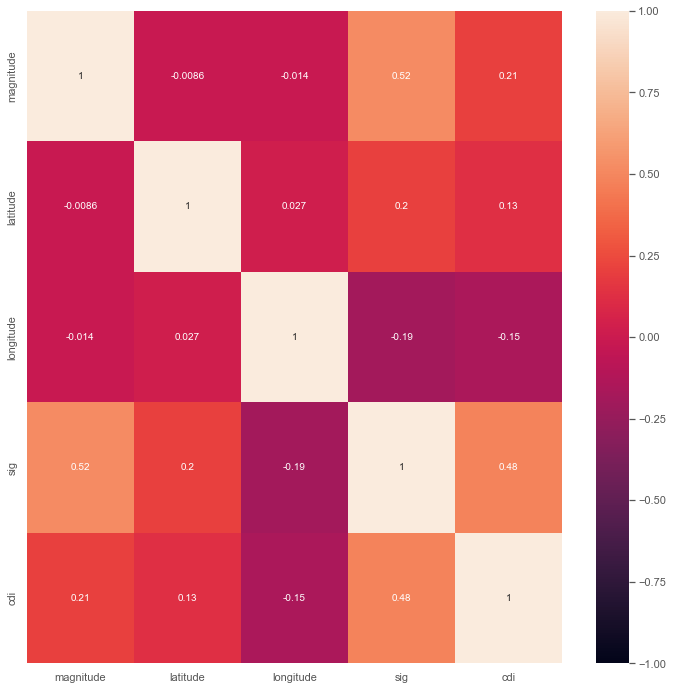

In [13]:
jointdata = pd.concat([earthcorr], axis =1)
f = plt.figure(figsize=(12,12))
sb.heatmap(jointdata.corr(), vmin = -1, vmax = 1, annot = True)

This heatmap shows that the important factors we propose do not have high correlation, and their correlation values do not exceed 0.3 in absolute value, except for the relatively high positive correlation between sig and magnitude, which is 0.48. Because the correlation values of these individual variables are not very high, except for the relatively high correlation between sig and cdi, we can focus on the uni-variable analysis of sig and cdi, as well as multi-variable analysis.

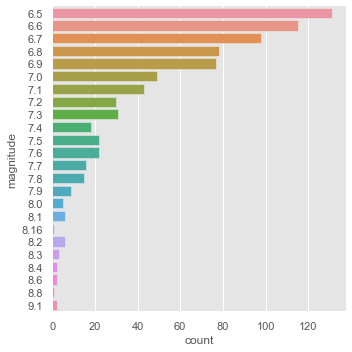

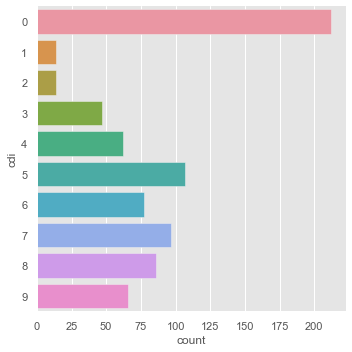

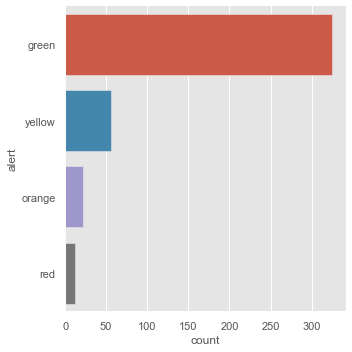

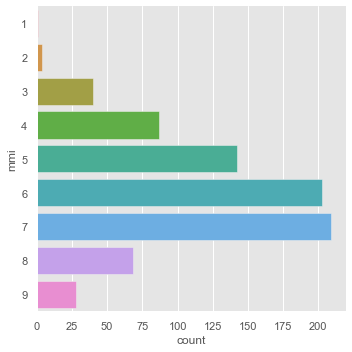

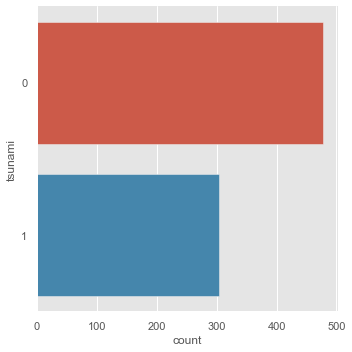

In [14]:
cattdata = pd.DataFrame(earthquake[["magnitude","cdi","alert","mmi","tsunami"]])
for var in cattdata:
    sb.catplot(y = var, data = cattdata, kind = "count" )
    print('\n')

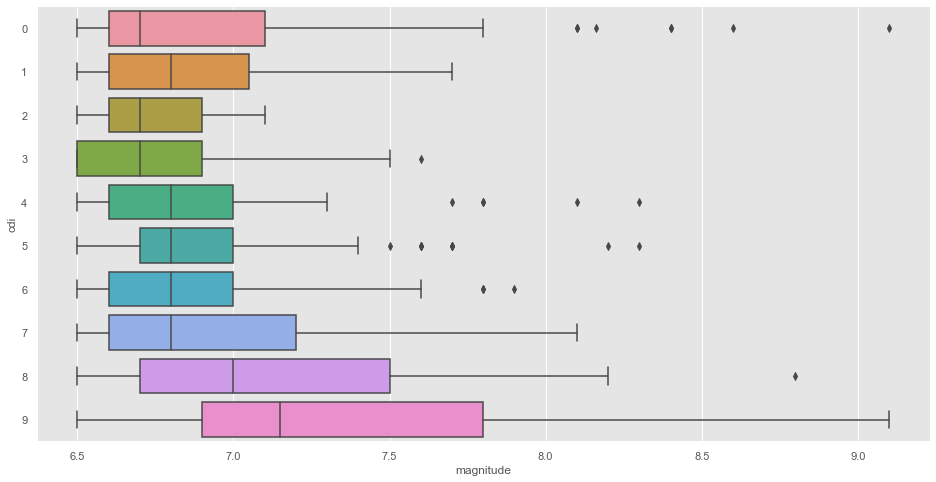

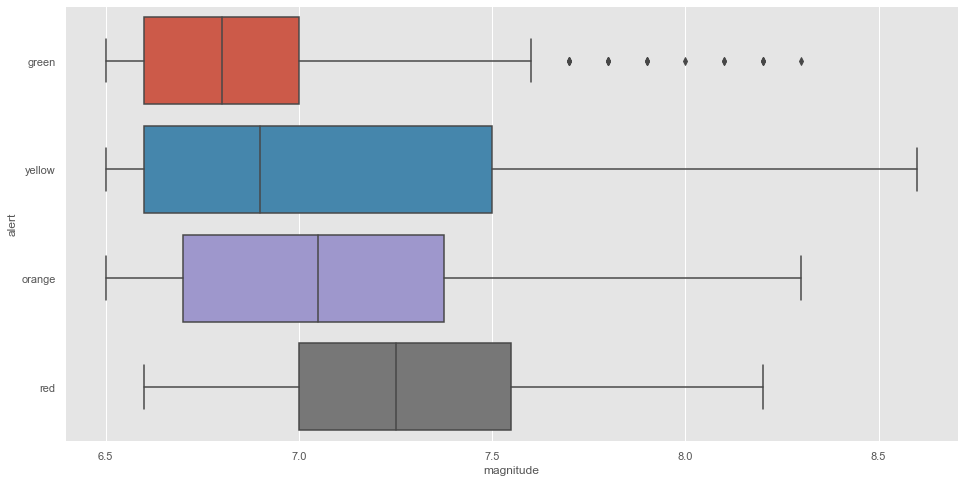

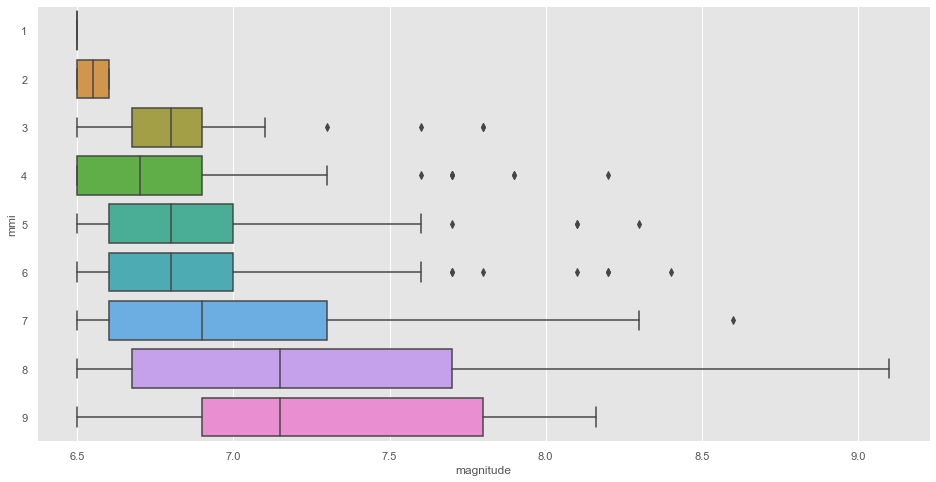

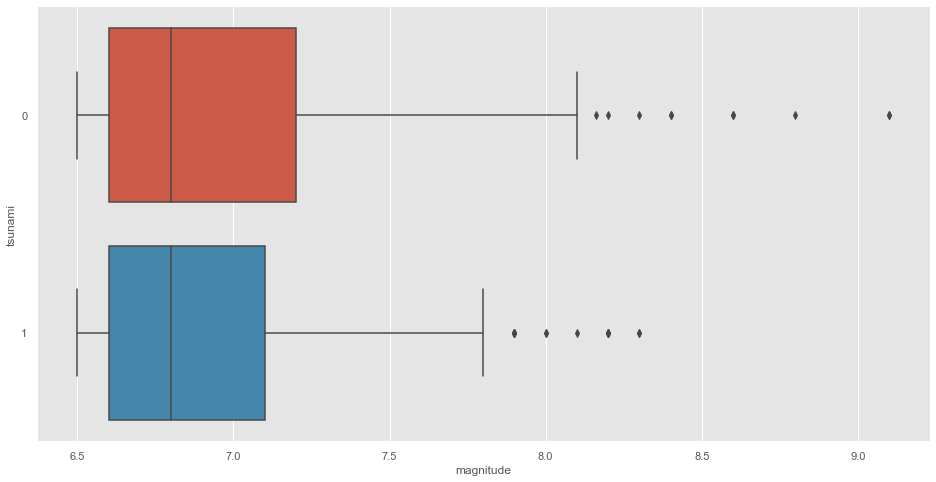

In [15]:
for var in cattdata:
    if var == 'magnitude':
        continue
    f = plt.figure(figsize=(16,8))
    sb.boxplot(x=earthquake["magnitude"], y=cattdata[var], orient="h")

CDI: The larger the level, the more the median shifts to the right. Alert: The median increases from green to yellow to orange to red. MMI: The larger the value, the larger the median. Tsunami: There is no significant relationship with earthquakes.

## Classify Richter magnitude of the earthquake
In order to simplfy our prediction model outcome, i.e., the options model faces, we have adopted the common terminology used by geologists to refer to earthquake magnitudes. Earthquakes with magnitudes ranging from 6.5 to 7.4 are referred to as "**major**," those ranging from 7.5 to 8.4 are referred to as "**great**," and those with magnitudes above 8.5 are referred to as "**super**."

In [16]:
def classify_magnitude(mag):
    if mag >= 7.5:
        return 'super'
    elif mag >= 7:
        return 'great'
    elif mag >= 6.5:
        return 'major'
    else:
        return 'other'

earthquake = earthquake.copy()
earthquake.loc[:, 'class'] = earthquake['magnitude'].apply(classify_magnitude)

## sig of different classes

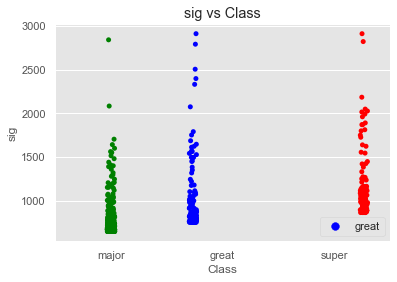

In [17]:
fig, ax = plt.subplots()
class_order = ['major', 'great', 'super']

sb.stripplot(x="class", y="sig", hue="class", data=earthquake, ax=ax, dodge=True, palette=['blue', 'green', 'red'], order=class_order)
ax.set_xlabel('Class')
ax.set_ylabel('sig')
ax.set_title('sig vs Class')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[::3])

plt.show()

After conducting stripplot visualization on the sig values of three types of earthquakes, namely major, great, and super, we observed that the scatter plots are mainly concentrated at the bottom of each vertical bar, and different vertical bars clearly exhibit distinct ranges. Also, clearly there are some outliers within each bar.

### Cancel out outliers from sig

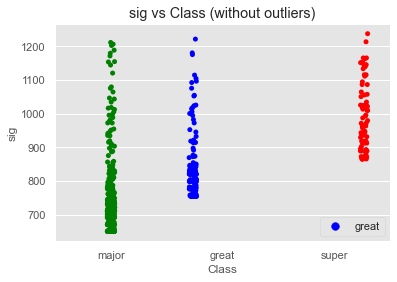

In [18]:
Q1 = earthquake['sig'].quantile(0.25)
Q3 = earthquake['sig'].quantile(0.75)
IQR = Q3 - Q1


filtered_earthquake = earthquake[(earthquake['sig'] >= Q1 - 1.5 * IQR) & (earthquake['sig'] <= Q3 + 1.5 * IQR)]


fig, ax = plt.subplots()
class_order = ['major', 'great', 'super']
sb.stripplot(x="class", y="sig", hue="class", data=filtered_earthquake, ax=ax, dodge=True, palette=['blue', 'green', 'red'], order=class_order)
ax.set_xlabel('Class')
ax.set_ylabel('sig')
ax.set_title('sig vs Class (without outliers)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[::3])

plt.show()

## Model Attempt 1 - Univariable Model for predicting magnitude

### Basic Linear Regression

In [19]:
earthquakedata = pd.read_csv('earthquake_clean.csv')
magnitude = pd.DataFrame(earthquakedata['magnitude']) #  For Response
sig = pd.DataFrame(earthquakedata['sig']) # For Predictor
sig_train, sig_test, magnitude_train, magnitude_test = train_test_split(sig, magnitude, test_size = 0.20, random_state=2)
print("Train Set :", sig_train.shape, magnitude_train.shape)
print("Test Set  :", sig_test.shape, magnitude_test.shape)

Train Set : (625, 1) (625, 1)
Test Set  : (157, 1) (157, 1)


Intercept of Regression 	: b =  [6.33272979]
Coefficients of Regression 	: a =  [[0.00069919]]



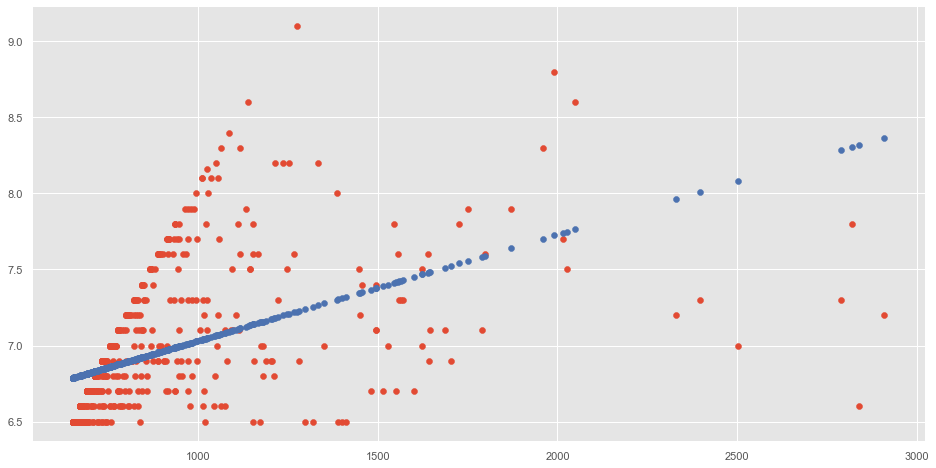

In [20]:
# Linear Regression using Train Data
linreg = LinearRegression() # create the linear regression object
linreg.fit(sig_train, magnitude_train)

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

magnitude_train_pred = linreg.predict(sig_train)
magnitude_test_pred = linreg.predict(sig_test)


f = plt.figure(figsize=(16, 8))
plt.scatter(sig_train, magnitude_train)
plt.scatter(sig_train, magnitude_train_pred, color = "b")
plt.show()

In [21]:
# train set- the Goodness of Fit
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(sig_train, magnitude_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(magnitude_train, magnitude_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.2469139477027925
Mean Squared Error (MSE) 	: 0.1473919227223525
Root Mean Squared Error (RMSE) 	: 0.38391655697866495


In [22]:
# Test set-prediction accuracy
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(sig_test, magnitude_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(magnitude_test, magnitude_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
#  Significant Index maybe a good predict factor

Explained Variance (R^2) 	: 0.33594185553386324
Mean Squared Error (MSE) 	: 0.1379421913108561
Root Mean Squared Error (RMSE) 	: 0.3714056963898859


Because sig has a relatively high correlation compared to other variables, it may be a useful uni-variable. Therefore, we conducted a linear regression analysis of its relationship with magnitude without removing outliers. A larger R^2 value indicates a better fit, but this R^2 value is 0.34, so this linear regression model is not a perfect fit for the data. Overall, although the linear regression model may not perfectly fit the data based on the R^2 value, the MSE and RMSE indicate that it is a relatively accurate model. However, there is still room for improvement, as there are many outliers on the right side, and removing them would result in a better fit.

### Cancel out outliers

In [23]:
sig2 = pd.DataFrame(earthquakedata['sig'])
magnitude2 = pd.DataFrame(earthquakedata['magnitude'])
sig = pd.DataFrame({'sig':[]})
magnitude = pd.DataFrame({'magnitude':[]})
Q1 = sig2.quantile(0.25)
Q3 = sig2.quantile(0.75)
IQR = Q3 - Q1
cccc_index = []
for i in range(0, len(sig2)):
    if (sig2.loc[i, 'sig'] > (int(Q3 + 1.5 * IQR)) or (sig2.loc[i, 'sig'] < int(Q1 - 1.5 * IQR))):
        cccc_index.append(i)
index_good = list(set(range(0, len(sig2))) - set(cccc_index))
for i in index_good:
    sig = pd.concat([sig, sig2.loc[i:i]])
    magnitude = pd.concat([magnitude, magnitude2.loc[i:i]])
sig_train = pd.DataFrame({'sig':[]})
sig_test = pd.DataFrame({'sig':[]})
magnitude_train = pd.DataFrame({'magnitude':[]})
magnitude_test = pd.DataFrame({'magnitude':[]})

index = sample(range(0, len(sig)), int(0.8 * len(sig)))
c_index = list(set(range(0, len(sig))) - set(index))
for i in index:
    sig_train = pd.concat([sig_train, sig.loc[i:i]])
    magnitude_train = pd.concat([magnitude_train, magnitude.loc[i:i]])

for i in c_index:
    sig_test = pd.concat([sig_test, sig.loc[i:i]])
    magnitude_test = pd.concat([magnitude_test, magnitude.loc[i:i]])

Intercept 	: b =  [5.25453311]
Coefficients 	: a =  [[0.00207951]]


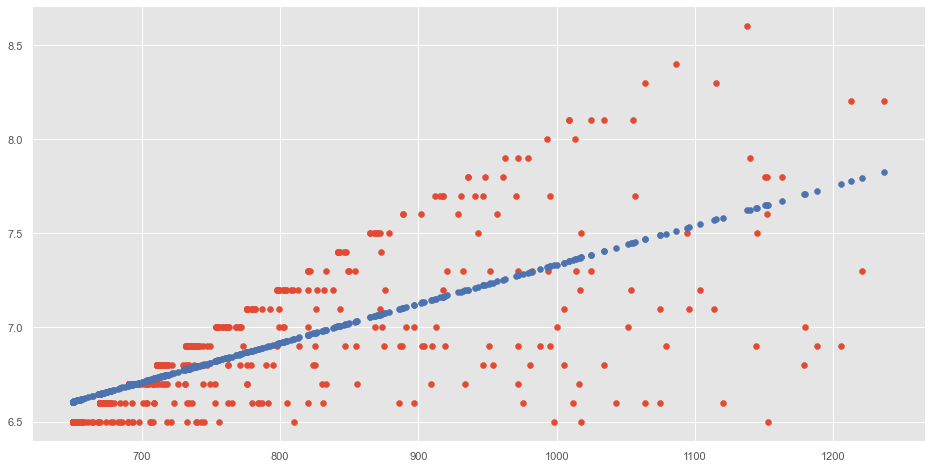

In [24]:
linreg = LinearRegression()
linreg.fit(sig_train, magnitude_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)
magnitude_train_pred = linreg.predict(sig_train)
magnitude_test_pred = linreg.predict(sig_test)
f = plt.figure(figsize=(16, 8))
plt.scatter(sig_train, magnitude_train)
plt.scatter(sig_train, magnitude_train_pred, color = "b")
plt.show()

In [25]:
# train set- the Goodness of Fit

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(sig_train, magnitude_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(magnitude_train, magnitude_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.49475672162484263
Mean Squared Error (MSE) 	: 0.07814079183175456
Root Mean Squared Error (RMSE) 	: 0.2795367450475063


In [26]:
# Test set-prediction accuracy
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(sig_test, magnitude_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(magnitude_test, magnitude_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.44616065502412494
Mean Squared Error (MSE) 	: 0.09513583541212811
Root Mean Squared Error (RMSE) 	: 0.30844097557252037


This graph shows the linear regression prediction of sig and magnitude after removing outliers. The results are better because the R^2 value has increased from 0.33 to 0.51, indicating that the model has better predictive ability. The MSE and RMSE are also smaller than those of the linear regression with outliers.

In [27]:
magnitude = pd.DataFrame(earthquakedata['magnitude']) #  For Response
mmi = pd.DataFrame(earthquakedata['mmi']) # For Predictor
mmi_train, mmi_test, magnitude_train, magnitude_test = train_test_split(mmi, magnitude, test_size = 0.20, random_state=10)
print("Train Set :", mmi_train.shape, magnitude_train.shape)
print("Test Set  :", mmi_test.shape, magnitude_test.shape)

Train Set : (625, 1) (625, 1)
Test Set  : (157, 1) (157, 1)


Intercept of Regression 	: b =  [6.4301392]
Coefficients of Regression 	: a =  [[0.08864437]]



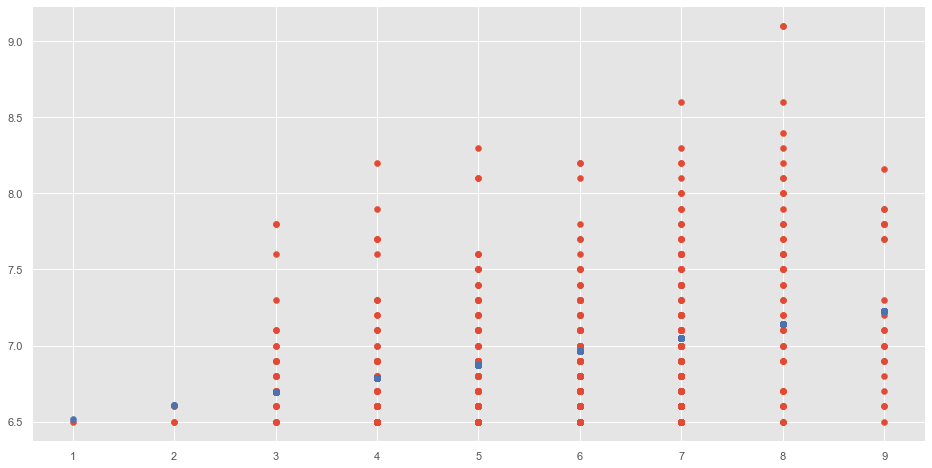

In [28]:
linreg = LinearRegression()
linreg.fit(mmi_train, magnitude_train)
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
magnitude_train_pred = linreg.predict(mmi_train)
magnitude_test_pred = linreg.predict(mmi_test)
f = plt.figure(figsize=(16, 8))
plt.scatter(mmi_train, magnitude_train)
plt.scatter(mmi_train, magnitude_train_pred, color = "b")
plt.show()

In [29]:
print("Explained Variance (R^2) \t:", linreg.score(mmi_train, magnitude_train))

def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(magnitude_train, magnitude_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.08519339884086075
Mean Squared Error (MSE) 	: 0.18466259798244467
Root Mean Squared Error (RMSE) 	: 0.42972386247734096


In [30]:
print("Explained Variance (R^2) \t:", linreg.score(mmi_test, magnitude_test))

def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(magnitude_test, magnitude_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
#  The prediction is too weak to use

Explained Variance (R^2) 	: 0.02636465593328574
Mean Squared Error (MSE) 	: 0.17331728224224305
Root Mean Squared Error (RMSE) 	: 0.4163139227100663


This prediction is too weak to use

## Model Attempt 2 - Multi-variable Training Model for predicting magnitude class

### DecisionTreeClassifier with max_depth of 2

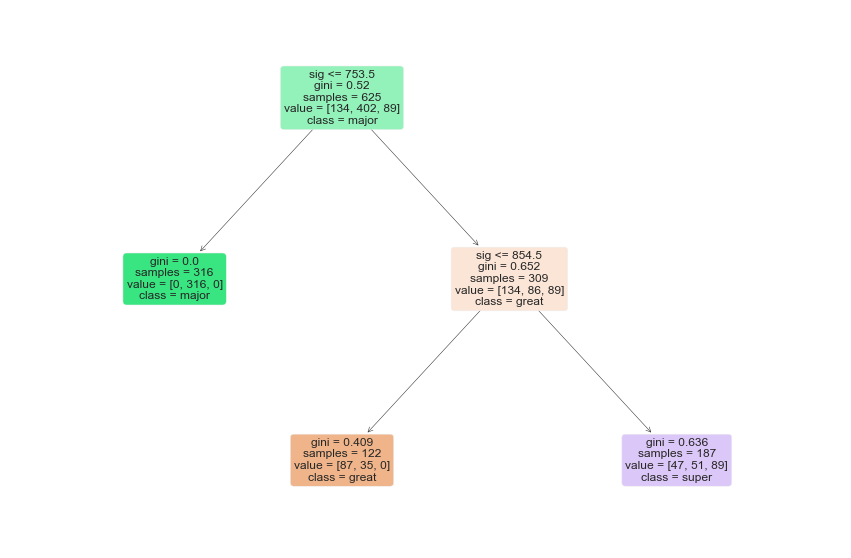

'As we can see in the decision tree, in the depth 1 branch, 316 data are split into one node simply by sig<=753. That is\nmainly because half of the earthquake is within the class of major while have low sig. This may cause potential overfitting in our decision tree model. '

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Encode the 'class' column
le = LabelEncoder()
earthquake['class_encoded'] = le.fit_transform(earthquake['class'])

# Define predictor and response variables
X = earthquake[['cdi', 'mmi', 'tsunami', 'sig', 'latitude', 'longitude']]
y = earthquake['class_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

# Train the decision tree model
dt = DecisionTreeClassifier(random_state=2, max_depth=2)
dt.fit(X_train, y_train)

# Predict alert levels using the testing data
y_pred = dt.predict(X_test)

class_names = [str(cls) for cls in le.classes_]
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, class_names=class_names, filled=True, rounded=True, fontsize=12)
plt.show()
"""As we can see in the decision tree, in the depth 1 branch, 316 data are split into one node simply by sig<=753. That is
mainly because half of the earthquake is within the class of major while have low sig. This may cause potential overfitting in our decision tree model. """

### Check the accuracy of the Model

Train Data Accuracy: 78.7200%
Train Data Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.65      0.68       134
           1       1.00      0.79      0.88       402
           2       0.48      1.00      0.64        89

    accuracy                           0.79       625
   macro avg       0.73      0.81      0.73       625
weighted avg       0.86      0.79      0.80       625



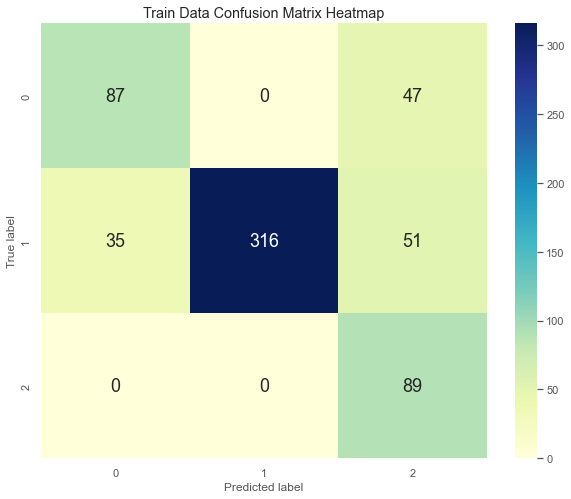

In [32]:
# Import necessary libraries
import seaborn as sb

# Calculate the confusion matrix
y_pred_train = dt.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sb.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', annot_kws={"size": 18})

# Add labels and a title
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Train Data Confusion Matrix Heatmap')

# Print the accuracy and other metrics
accuracy = accuracy_score(y_train, y_pred_train)
print("Train Data Accuracy: {:.4f}%".format(accuracy * 100))
print("Train Data Classification Report:\n", classification_report(y_train, y_pred_train))
plt.show()


Test Data Accuracy: 75.7962%
Test DataClassification Report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.68        37
           1       1.00      0.73      0.85        97
           2       0.46      1.00      0.63        23

    accuracy                           0.76       157
   macro avg       0.72      0.80      0.72       157
weighted avg       0.85      0.76      0.78       157



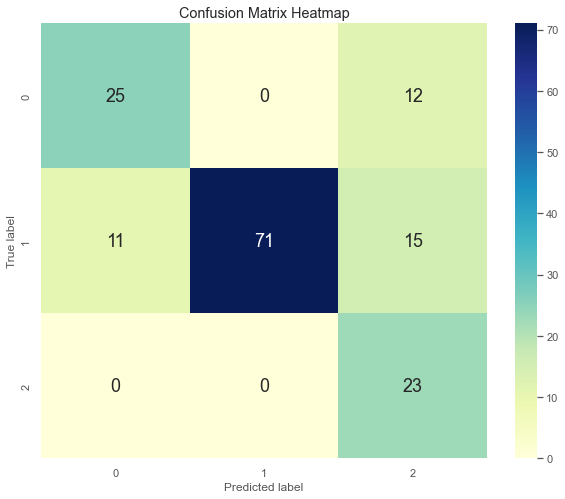

In [33]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sb.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', annot_kws={"size": 18})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix Heatmap')
accuracy = accuracy_score(y_test, y_pred)
print("Test Data Accuracy: {:.4f}%".format(accuracy * 100))
print("Test DataClassification Report:\n", classification_report(y_test, y_pred))
plt.show()

### DecisionTreeClassifier with max_depth of 4

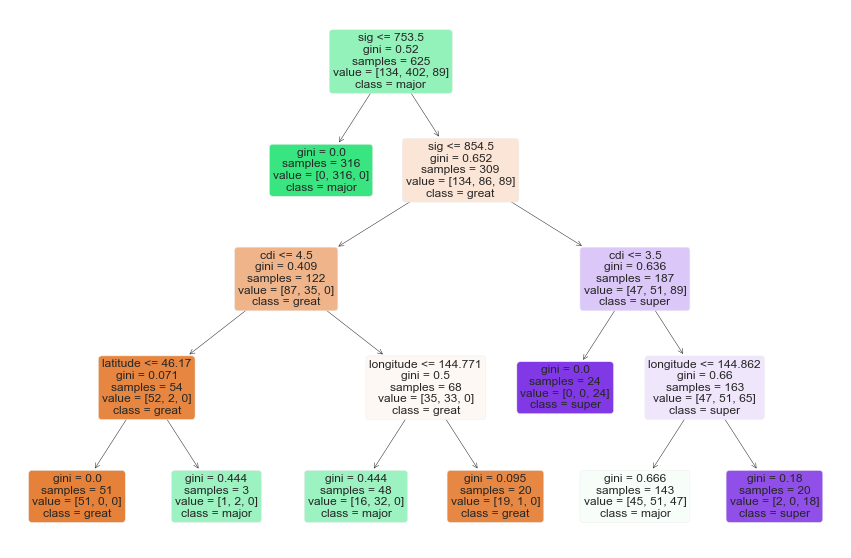

In [34]:
# Encode the 'class' column
le = LabelEncoder()
earthquake['class_encoded'] = le.fit_transform(earthquake['class'])

# Define predictor and response variables
X = earthquake[['cdi', 'mmi', 'tsunami', 'sig', 'latitude', 'longitude']]
y = earthquake['class_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

# Train the decision tree model
dt = DecisionTreeClassifier(random_state=2, max_depth=4)
dt.fit(X_train, y_train)

# Predict alert levels using the testing data
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_names = [str(cls) for cls in le.classes_]
plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X.columns, class_names=class_names, filled=True, rounded=True, fontsize=12)
plt.show()

Train Data Accuracy: 82.0800%
Train Data Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.52      0.68       134
           1       0.79      1.00      0.88       402
           2       0.95      0.47      0.63        89

    accuracy                           0.82       625
   macro avg       0.91      0.66      0.73       625
weighted avg       0.85      0.82      0.80       625



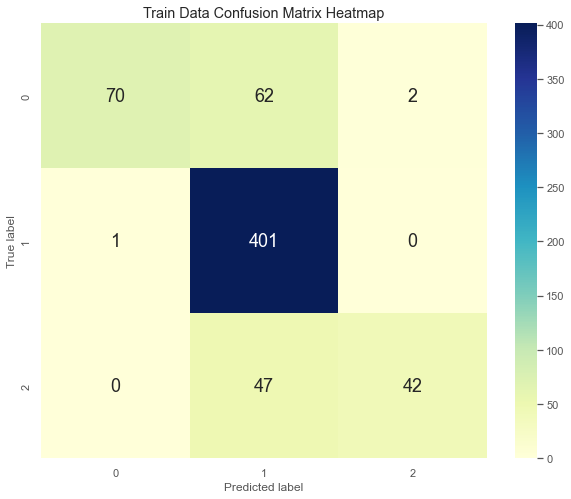

In [35]:
# Import necessary libraries
import seaborn as sb

# Calculate the confusion matrix
y_pred_train = dt.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sb.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', annot_kws={"size": 18})

# Add labels and a title
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Train Data Confusion Matrix Heatmap')

# Print the accuracy and other metrics
accuracy = accuracy_score(y_train, y_pred_train)
print("Train Data Accuracy: {:.4f}%".format(accuracy * 100))
print("Train Data Classification Report:\n", classification_report(y_train, y_pred_train))
plt.show()

Test Data Accuracy: 78.3439%
Test DataClassification Report:
               precision    recall  f1-score   support

           0       1.00      0.49      0.65        37
           1       0.75      1.00      0.85        97
           2       0.89      0.35      0.50        23

    accuracy                           0.78       157
   macro avg       0.88      0.61      0.67       157
weighted avg       0.83      0.78      0.76       157



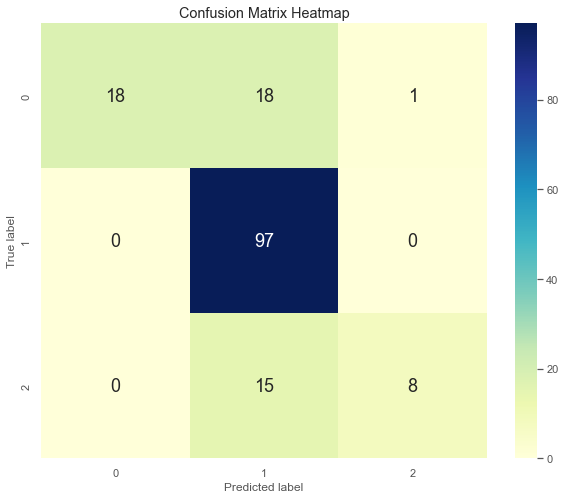

In [36]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sb.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', annot_kws={"size": 18})
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix Heatmap')
accuracy = accuracy_score(y_test, y_pred)
print("Test Data Accuracy: {:.4f}%".format(accuracy * 100))
print("Test DataClassification Report:\n", classification_report(y_test, y_pred))
plt.show()

### Decision Tree Model with unlimited depth

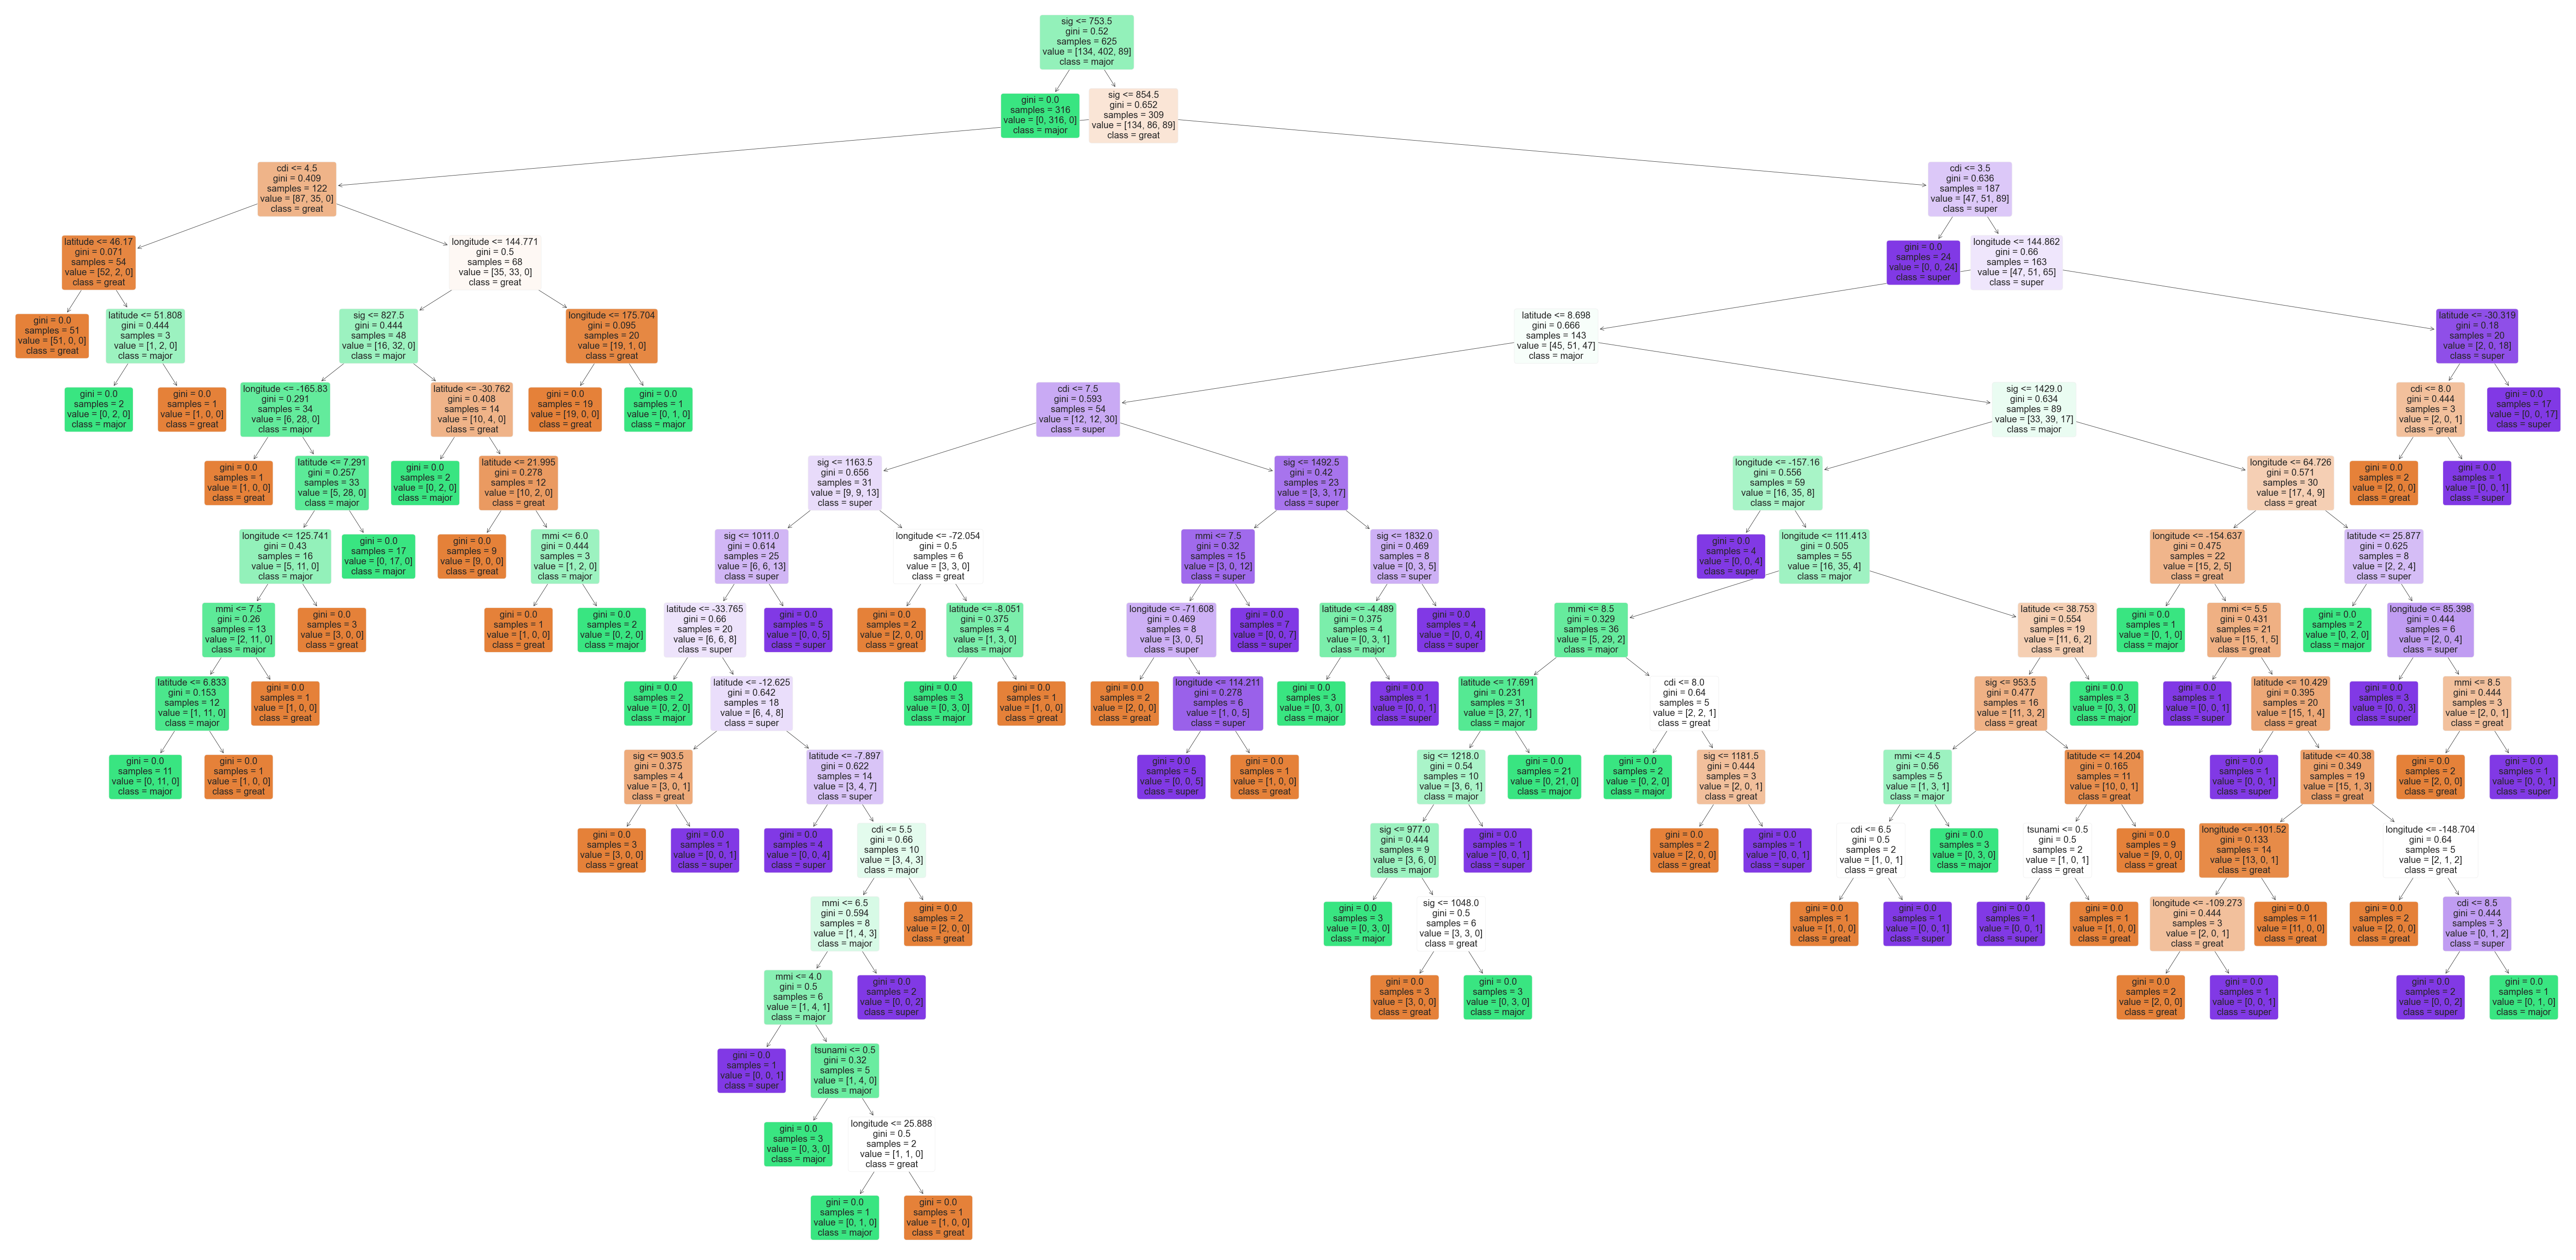

Train Data Accuracy: 100.0000%
Test Data Accuracy: 80.8917%
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.73      0.68        37
           1       0.91      0.90      0.90        97
           2       0.72      0.57      0.63        23

    accuracy                           0.81       157
   macro avg       0.75      0.73      0.74       157
weighted avg       0.81      0.81      0.81       157



In [37]:
le = LabelEncoder()
earthquake['class_encoded'] = le.fit_transform(earthquake['class'])

# Define predictor and response variables
X = earthquake[['cdi', 'mmi', 'tsunami', 'sig', 'latitude', 'longitude']]
y = earthquake['class_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

# Train the decision tree model
dt = DecisionTreeClassifier(random_state=2)
dt.fit(X_train, y_train)

# Predict alert levels using the testing data
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_names = [str(cls) for cls in le.classes_]
plt.figure(figsize=(60, 30), dpi=120)
plot_tree(dt, feature_names=X.columns, class_names=class_names, filled=True, rounded=True, fontsize=12)
plt.show()
# Print the accuracy and other metrics
y_pred_train = dt.predict(X_train)
accuracy2 = accuracy_score(y_train, y_pred_train)
print("Train Data Accuracy: {:.4f}%".format(accuracy2 * 100))
print("Test Data Accuracy: {:.4f}%".format(accuracy * 100))
print("Classification Report:\n", classification_report(y_test, y_pred))

### DecisionTreeRegressor: training regression model

Mean Squared Error: 0.0707
R^2 Score: 0.6810


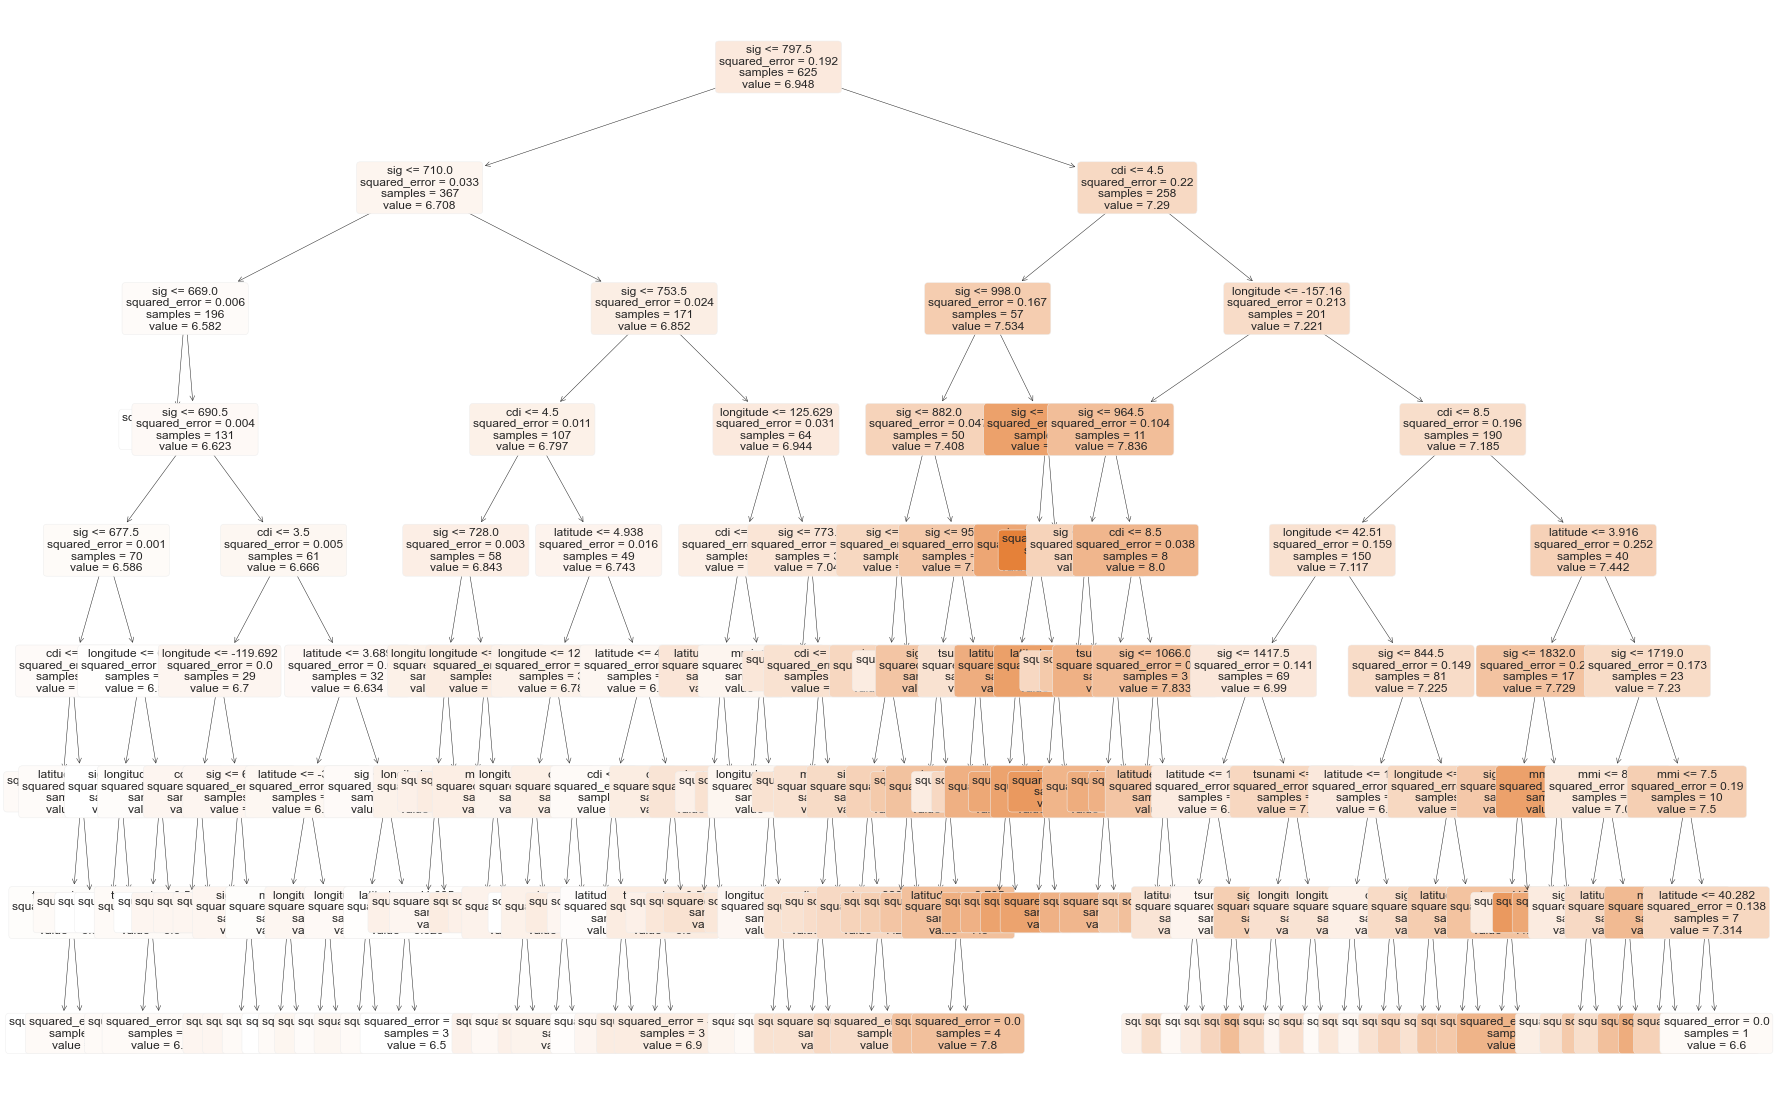

In [38]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

# Define predictor and response variables
X = earthquakedata[['cdi', 'mmi', 'tsunami', 'sig', 'latitude', 'longitude']]
y = earthquakedata['magnitude']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

# Train the decision tree regressor model
dt_reg = DecisionTreeRegressor(random_state=12, max_depth=8)
dt_reg.fit(X_train, y_train)

# Predict magnitudes using the testing data
y_pred = dt_reg.predict(X_test)

# Calculate the mean squared error and R^2 score of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the mean squared error and R^2 score
print("Mean Squared Error: {:.4f}".format(mse))
print("R^2 Score: {:.4f}".format(r2))

# Visualize the decision tree
plt.figure(figsize=(30, 20))
plot_tree(dt_reg, feature_names=X.columns, filled=True, rounded=True, fontsize=12)
plt.show()


Training Accuracy: 64.9600%
Testing Accuracy: 62.4204%


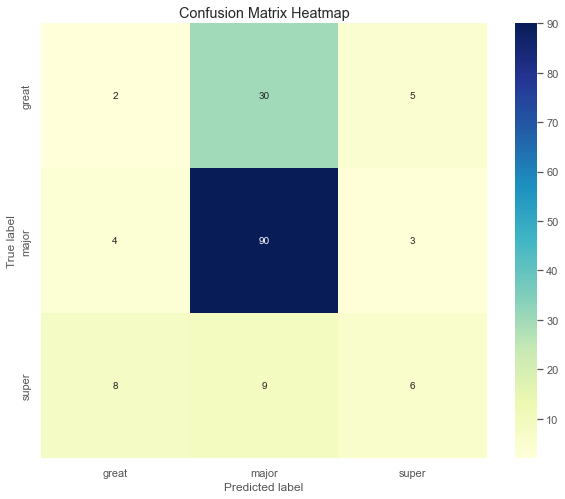

In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sb
import matplotlib.pyplot as plt

# Encode the 'class' column
le = LabelEncoder()
earthquake['class_encoded'] = le.fit_transform(earthquake['class'])

# Define predictor and response variables
X = earthquake[['cdi', 'mmi', 'tsunami', 'sig', 'latitude', 'longitude']]
y = earthquake['class_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

# Train the SVM model
svm = SVC(kernel='linear', random_state=2)
svm.fit(X_train, y_train)

# Predict alert levels using the training and testing data
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate and print accuracy for the training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy: {:.4f}%".format(train_accuracy * 100))
print("Testing Accuracy: {:.4f}%".format(test_accuracy * 100))

class_names = [str(cls) for cls in le.classes_]

# Display the confusion matrix for the testing data
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sb.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix Heatmap')
plt.show()

Training Accuracy: 98.24%
Testing Accuracy: 84.08%


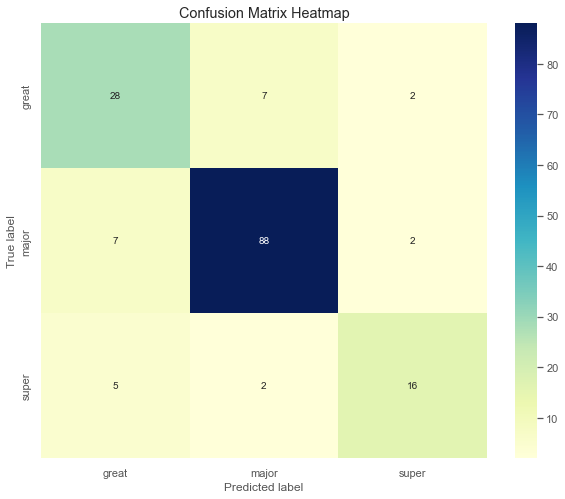

In [40]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sb
import matplotlib.pyplot as plt

# Encode the 'class' column
le = LabelEncoder()
earthquake['class_encoded'] = le.fit_transform(earthquake['class'])

# Define predictor and response variables
X = earthquake[['cdi', 'mmi', 'tsunami', 'sig', 'latitude', 'longitude']]
y = earthquake['class_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

# Train the Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=80, max_depth=8, random_state=2)
rfc.fit(X_train, y_train)

# Predict alert levels using the training and testing data
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

# Calculate and print accuracy for the training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))

class_names = [str(cls) for cls in le.classes_]

# Display the confusion matrix for the testing data
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sb.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix Heatmap')
plt.show()
